In [117]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import scipy as sp
import numpy.random as npr
%matplotlib notebook
np.set_printoptions(threshold=np.inf)

npr.seed(3)

data = pd.read_csv('simple_parameters/simple_parameters_data.csv').dropna()
data['language'] = data['language'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

# english esperanto finnish french german italian
# 0       1         2       3      4      5

# Turn categorical values into numbers instead of strings
#for val in data:
#    data[val] = data[val].astype('category')
X = data.values.copy()
np.random.shuffle(X)

Y = X[:,0]
X = X[:,1:]
print(Y)
#[ 3.  5.  4.  1.  0.  2.]
# french italian german esperanto english finnish

[ 3.  5.  4.  1.  0.  2.]


In [118]:
from scipy.spatial.distance import pdist
distanceMatrix = pdist(X, 'euclidean')
print(distanceMatrix)

[  6428968.07814004    588600.09920111   8490438.07160745
  11871360.26474959  15220348.18074755   5840368.04763464
   2061470.01382266  18300328.21488128   8791380.10344064
   7901838.05134662  12459960.22479959  14631748.1445522   20361798.22701005
   6729910.13018079  27091708.22551439]


In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(distanceMatrix)
print(Z)

# The first two numbers are indices of clusters
# Third number is the linkage distance
# Fourth number is the number of languages within the cluster

[[  0.00000000e+00   2.00000000e+00   5.88600099e+05   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+00   2.06147001e+06   2.00000000e+00]
 [  6.00000000e+00   7.00000000e+00   5.84036805e+06   4.00000000e+00]
 [  5.00000000e+00   8.00000000e+00   6.72991013e+06   5.00000000e+00]
 [  4.00000000e+00   9.00000000e+00   1.18713603e+07   6.00000000e+00]]


In [120]:
# language  german italian english finnish esperanto french
# index     4      5       0       2       1         3

from scipy.cluster.hierarchy import leaves_list
leaves = leaves_list(Z)
print(leaves)



[4 5 0 2 1 3]


In [121]:
from scipy.cluster.hierarchy import cophenet
c, coph_dists = cophenet(Z, pdist(X))
print('c: ', c)

c:  0.821359116679


<IPython.core.display.Javascript object>


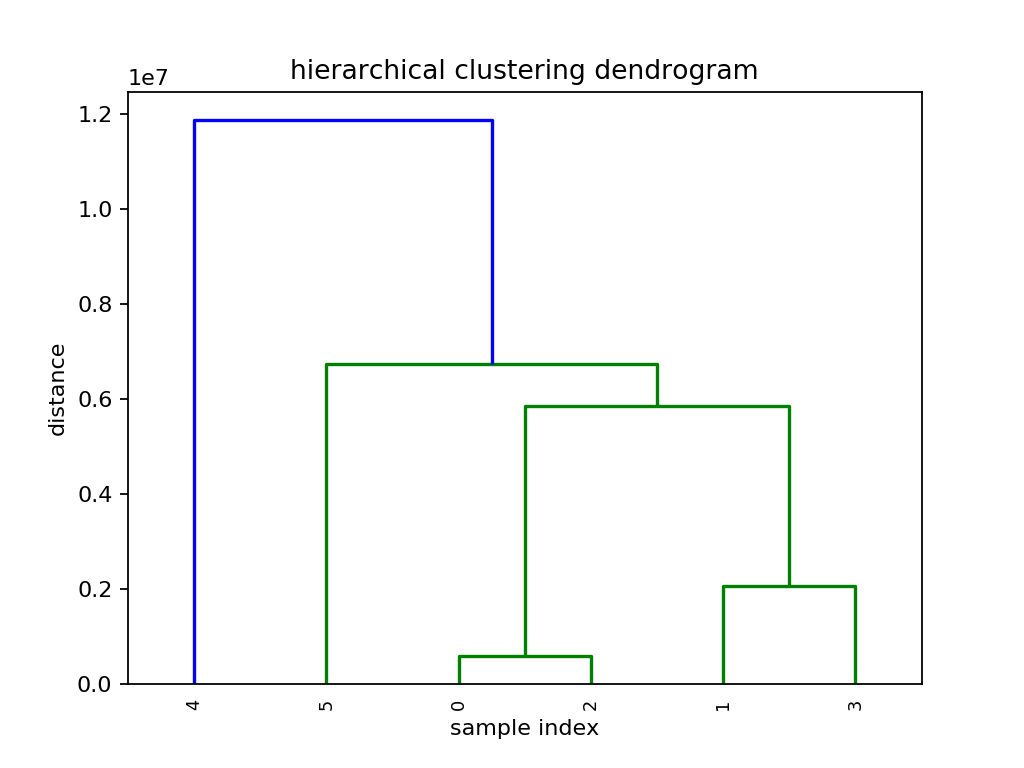

In [122]:
# plot dendrogram
plt.figure()
plt.title('hierarchical clustering dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., # rotates x axis labels
    leaf_font_size=8., # font size for x axis labels
    show_contracted=True,
)
plt.show()

#[ 3.  5.  4.  1.  0.  2.]
# french italian german esperanto english finnish
# 0       1         2       3      4      5

at level 1:
    english
    finnish
    french, german
    italian, esperanto
    

In [128]:
from scipy.cluster.hierarchy import fcluster
threshold = 0.6
clusters = fcluster(Z, threshold, criterion='distance')
print('clusters: ', max(clusters))
print(clusters)

# T[i] is the flat cluster number to which original observation i belongs.

clusters:  6
[1 3 2 4 6 5]


<IPython.core.display.Javascript object>


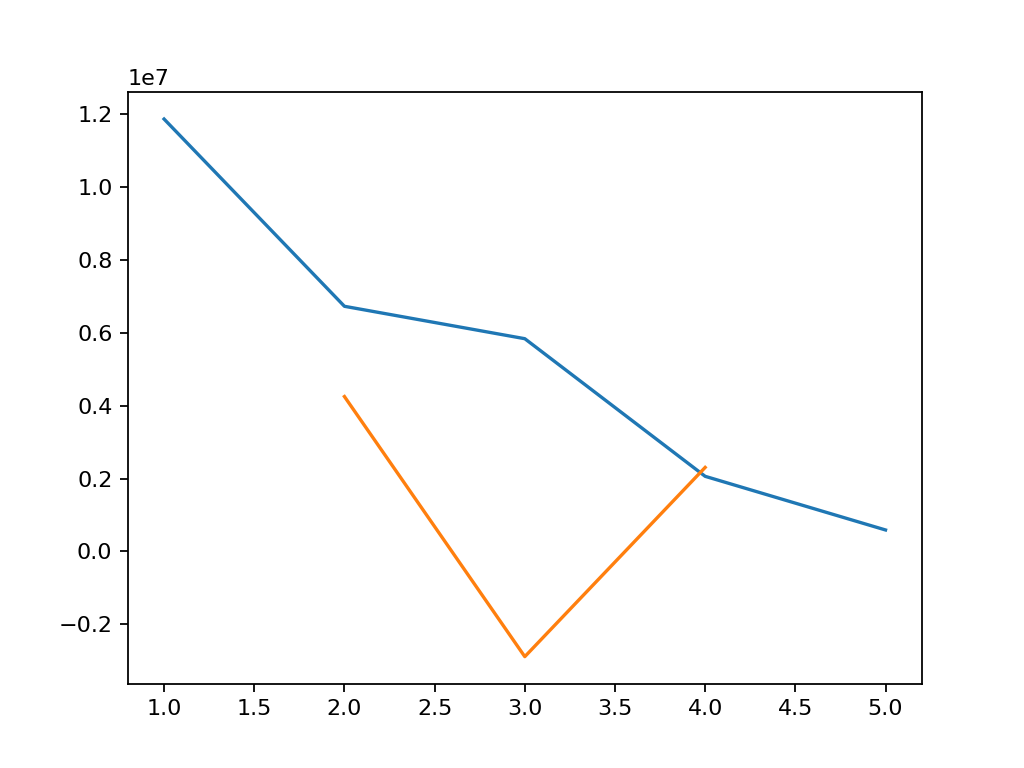

clusters: 2


In [129]:
# elbow method
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure()
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)